d:\miniconda\envs\pytorch\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


     SO2   CO NO2 O3-1H PM10 PM2.5  NO
1     12  0.4  75     4   36    10  22
2     11  0.4  74     4   43     8  21
3      9  0.3  72    11   43     8  17
4      8  0.3  63    18   43     8   9
5      8  0.3  58    20   43     8   6
...   ..  ...  ..   ...  ...   ...  ..
8637  12  0.7  36   164   99    46   1
8638  13  0.7  35   169   99    46   2
8639  14  0.7  33   168   99    46   2
8640  13  0.7  30   172   99    46   2
8641  15  0.7  29   177   92    47   2

[8641 rows x 7 columns]


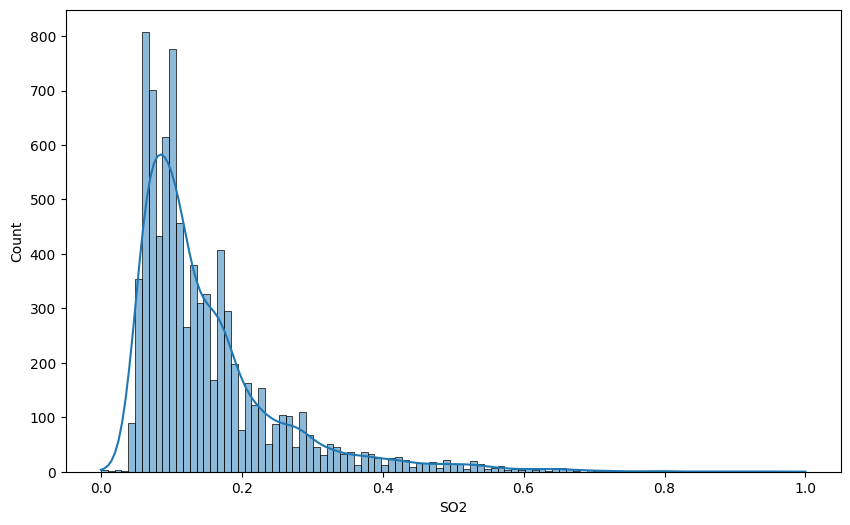

In [1]:
import numpy as np
from sklearn import preprocessing
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


class PreProcessing():

    def __init__(self,filepath):
        self.file_path = filepath
        self.data = pd.read_excel(self.file_path, na_values=[
                                  '0.0(E)', '-99.0(E)'])
        self.index = self.data.iloc[1:,0]
        self.data = self.data.iloc[1:, 7:15]
        self.data.columns = ["SO2", "CO", "NO2", "O3-1H","O3-8H" ,"PM10", "PM2.5", "NO"]
        self.data = self.data.drop(["O3-8H"],axis=1,inplace=False)


    def remove_outliers(self):
        # Q1 = self.data.quantile(0.25)
        # Q3 = self.data.quantile(0.75)
        # IQR = Q3 - Q1
        # condition = ~((self.data < (Q1 - 1.5 * IQR)) |
        #               (self.data > (Q3 + 1.5 * IQR))).any(axis=1)
        # self.after_plot_box_data = self.data[condition]
        mean = self.data.mean()
        std = self.data.std()
        condition = (self.data > (mean - 3 * std)) & (self.data < (mean + 3 * std))
        self.after_plot_box_data = self.data[condition].dropna()

    def interpolate(self):
        self.after_plot_box_data  =pd.DataFrame(self.after_plot_box_data,dtype=float)
        self.interpolate_data = self.after_plot_box_data.interpolate(method="linear")
        return self.interpolate_data

    def normalize(self):
        min_max_scaler = preprocessing.MinMaxScaler()
        self.norm_data = min_max_scaler.fit_transform(self.interpolate_data)
        # self.norm_data = min_max_scaler.fit_transform(self.data)
        self.norm_data = pd.DataFrame(self.norm_data, columns=self.interpolate_data.columns)
        return self.norm_data
    
    def plot_box_data(self,data):
        plt.figure(figsize=(10, 6))
        sns.boxplot(data=data)
        plt.show()

    def plot_data(self,data):
        plt.figure(figsize=(10, 6))
        sns.lineplot(x=self.index, y=data)
        x = np.arange(0, 8642, dtype=int)
        plt.xticks(ticks=x[::2000])
        plt.xlabel("Time")
        plt.ylabel("Data")
        plt.show()

    def displot(self,data):
        plt.figure(figsize=(10, 6))
        sns.displot(data,kde=True)
        plt.show()

    def pairplot(self):
        plt.figure(figsize=(10, 6))
        sns.pairplot(self.norm_data,diag_kind='kde',kind='reg',markers="*")
        plt.show()

    def histplot(self,data):
        plt.figure(figsize=(10, 6))
        sns.histplot(data,kde=True)
        plt.show()
        


a = PreProcessing(r"数据\国测站数据.xls")
print(a.data)

a.remove_outliers()
a.interpolate()
a.norm_data = a.normalize()
# a.plot_box_data(a.data)
# a.plot_data(a.data["SO2"])
# a.displot(a.data["SO2"])
# a.pairplot()
a.histplot(a.norm_data["SO2"])